In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates

df = pd.read_csv("household_power_consumption.txt", sep=";")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


C:\Users\julia\AppData\Local\Temp\ipykernel_20984\103193359.py:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_power_consumption.txt", sep=";")


In [3]:
# 1
# 10 primeiras linhas
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


# 2.
A variável `Global_active_power` representa o consumo de energia ativo dos sistemas
elétricos, ou seja, o consumo que gera calor, movimento, luz, etc., enquanto a
`Global_reactive_power` representa o consumo de energia reativo dos sistemas,
utilizado para gerar campos eletromagnéticos necessários para o funcionamento
dos equipamentos

In [4]:
# 3
print("nulos:", df.isnull().sum())

nulos: Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [5]:
df = df.dropna() # tirar valores nulos

In [6]:
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")
df["Global_reactive_power"] = pd.to_numeric(df["Global_reactive_power"], errors="coerce")
df["Voltage"] = pd.to_numeric(df["Voltage"], errors="coerce")
df["Global_intensity"] = pd.to_numeric(df["Global_intensity"], errors="coerce")
df["Sub_metering_1"] = pd.to_numeric(df["Sub_metering_1"], errors="coerce")
df["Sub_metering_2"] = pd.to_numeric(df["Sub_metering_2"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [7]:
# 4

def to_datetime(r):
    [day, month, year] = map(int, r["Date"].split("/"))
    [hour, minute, second] = map(int, r["Time"].split(":"))
    return datetime.datetime(year, month, day, hour, minute, second, 0, datetime.UTC)

df["Date"] = df.apply(to_datetime, axis=1)
del df["Time"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype              
---  ------                 -----              
 0   Date                   datetime64[ns, UTC]
 1   Global_active_power    float64            
 2   Global_reactive_power  float64            
 3   Voltage                float64            
 4   Global_intensity       float64            
 5   Sub_metering_1         float64            
 6   Sub_metering_2         float64            
 7   Sub_metering_3         float64            
dtypes: datetime64[ns, UTC](1), float64(7)
memory usage: 140.7 MB


In [8]:
# 5

so_2007 = df[df["Date"].map(lambda x: x.year) == 2007]
media_2007 = so_2007["Global_active_power"].mean()
print("Global_active_power médio em 2007:", media_2007)

Global_active_power médio em 2007: 1.117007500924916


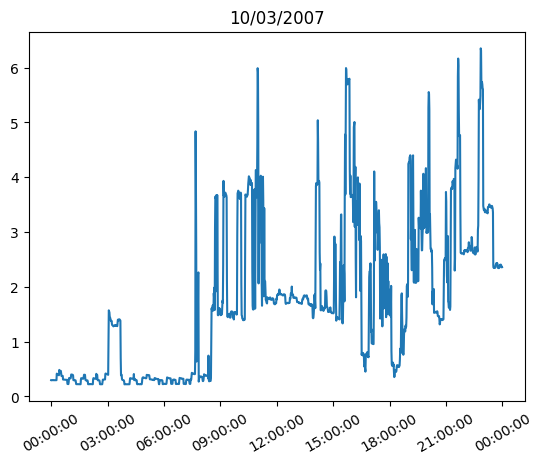

In [9]:
# 6

dia = df[
    df.apply(lambda r:  r["Date"].year == 2007 and r["Date"].month == 3 and r["Date"].day == 10, axis=1)
]

plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
plt.gca().xaxis.set_major_locator(dates.AutoDateLocator())
plt.xticks(rotation=30)
plt.title("10/03/2007")
plt.plot(dia["Date"], pd.DataFrame(dia["Global_active_power"]))

(array([5.00000e+00, 4.70000e+01, 2.74000e+02, 5.92000e+02, 9.10000e+02,
        1.64800e+03, 3.28400e+03, 6.41800e+03, 1.21740e+04, 2.01810e+04,
        3.16000e+04, 4.99680e+04, 7.26170e+04, 1.03178e+05, 1.51401e+05,
        2.14666e+05, 2.76495e+05, 2.99680e+05, 2.73706e+05, 2.04952e+05,
        1.36951e+05, 8.34650e+04, 5.02070e+04, 2.84610e+04, 1.54520e+04,
        7.03200e+03, 2.63000e+03, 9.51000e+02, 2.95000e+02, 4.00000e+01]),
 array([223.2       , 224.23166667, 225.26333333, 226.295     ,
        227.32666667, 228.35833333, 229.39      , 230.42166667,
        231.45333333, 232.485     , 233.51666667, 234.54833333,
        235.58      , 236.61166667, 237.64333333, 238.675     ,
        239.70666667, 240.73833333, 241.77      , 242.80166667,
        243.83333333, 244.865     , 245.89666667, 246.92833333,
        247.96      , 248.99166667, 250.02333333, 251.055     ,
        252.08666667, 253.11833333, 254.15      ]),
 <BarContainer object of 30 artists>)

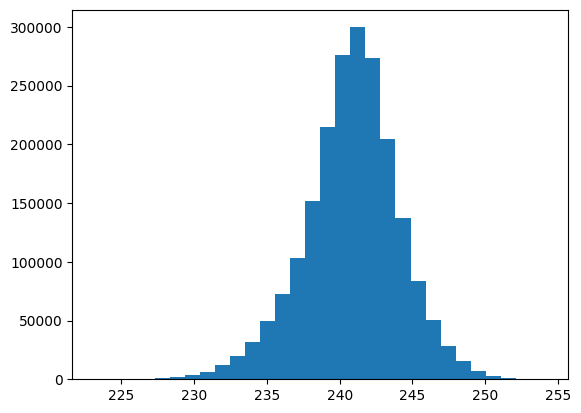

In [10]:
# 7

plt.hist(df["Voltage"], 30)

In [11]:
# 8

def group_by_mes(r):
    return f"{r["Date"].month:02}/{r["Date"].year}"

meses_groups = df.apply(group_by_mes, axis=1)
meses = df["Global_active_power"].groupby(by=meses_groups)
meses.mean()

01/2007    1.546034
01/2008    1.459920
01/2009    1.410202
01/2010    1.430525
02/2007    1.401084
02/2008    1.181384
02/2009    1.247568
02/2010    1.375855
03/2007    1.318627
03/2008    1.245337
03/2009    1.226735
03/2010    1.130075
04/2007    0.891189
04/2008    1.115972
04/2009    1.140690
04/2010    1.027295
05/2007    0.985862
05/2008    1.024281
05/2009    1.012856
05/2010    1.095284
06/2007    0.826814
06/2008    0.994096
06/2009    0.840756
06/2010    0.969615
07/2007    0.667367
07/2008    0.794781
07/2009    0.618121
07/2010    0.721068
08/2007    0.764186
08/2008    0.276488
08/2009    0.664619
08/2010    0.590778
09/2007    0.969318
09/2008    0.987680
09/2009    0.986841
09/2010    0.956442
10/2007    1.103911
10/2008    1.136768
10/2009    1.144486
10/2010    1.163399
11/2007    1.294473
11/2008    1.387066
11/2009    1.274743
11/2010    1.196854
12/2006    1.901295
12/2007    1.626474
12/2008    1.275189
12/2009    1.364421
Name: Global_active_power, dtype: float6

In [12]:
# 9
def group_by_dia(r):
    return f"{r["Date"].day:02}/{r["Date"].month:02}/{r["Date"].year}"

dias_groups = df.apply(group_by_dia, axis=1)
dias = df["Global_active_power"].groupby(by=dias_groups)
somas = dias.sum()
idxmax = somas.idxmax()
max = somas[idxmax]
print(f"Dia com maior consumo foi {idxmax} com {max}kWh")

Dia com maior consumo foi 23/12/2006 com 4773.386kWh


In [13]:
# 10

def group_by_classe(r):
    if r["Date"].weekday() in [5,6]:
        return "weekend"
    else:
        return "weekday"

classes_groups = df.apply(group_by_classe, axis=1)
classes = df["Global_active_power"].groupby(by=classes_groups)
classes.mean()

weekday    1.035472
weekend    1.234232
Name: Global_active_power, dtype: float64

In [14]:
# 11
df[["Global_active_power", "Global_reactive_power", "Global_intensity", "Voltage"]].corr("pearson")

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Global_active_power,1.000000,0.247017,0.998889,-0.399762
Global_reactive_power,0.247017,1.000000,0.266120,-0.112246
Global_intensity,0.998889,0.266120,1.000000,-0.411363
Voltage,-0.399762,-0.112246,-0.411363,1.000000


In [15]:
# 12

def total_metering(r):
    return r["Sub_metering_1"] + r["Sub_metering_2"] + r["Sub_metering_3"]

df["Total_Sub_metering"] = df.apply(total_metering, axis=1)
df.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,2006-12-16 17:24:00+00:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0
1,2006-12-16 17:25:00+00:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0
2,2006-12-16 17:26:00+00:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0
3,2006-12-16 17:27:00+00:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0
4,2006-12-16 17:28:00+00:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0


In [16]:
# 13
df["Global_active_power"] = df["Global_active_power"]

meses = df.groupby(by=meses_groups)
metering_total = meses["Total_Sub_metering"].sum()
power_total = df["Global_active_power"].mean()
metering_total > power_total


01/2007    True
01/2008    True
01/2009    True
01/2010    True
02/2007    True
02/2008    True
02/2009    True
02/2010    True
03/2007    True
03/2008    True
03/2009    True
03/2010    True
04/2007    True
04/2008    True
04/2009    True
04/2010    True
05/2007    True
05/2008    True
05/2009    True
05/2010    True
06/2007    True
06/2008    True
06/2009    True
06/2010    True
07/2007    True
07/2008    True
07/2009    True
07/2010    True
08/2007    True
08/2008    True
08/2009    True
08/2010    True
09/2007    True
09/2008    True
09/2009    True
09/2010    True
10/2007    True
10/2008    True
10/2009    True
10/2010    True
11/2007    True
11/2008    True
11/2009    True
11/2010    True
12/2006    True
12/2007    True
12/2008    True
12/2009    True
Name: Total_Sub_metering, dtype: bool

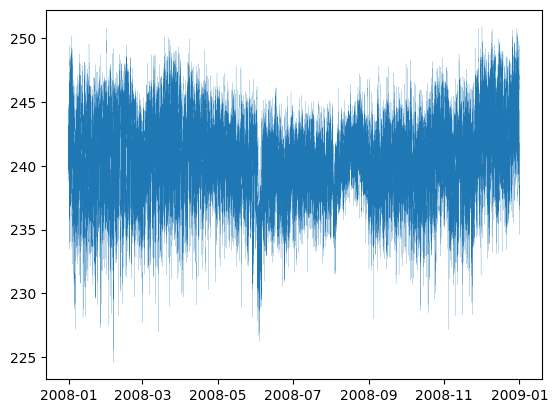

In [17]:
# 14

so_2008 = df[df["Date"].map(lambda x: x.year) == 2008]
so_2008.head()

plt.plot(so_2008["Date"],so_2008["Voltage"], lw=0.1)

In [18]:
# 15
verao_ou_inverno = df[df["Date"].map(lambda x: x.month in [1,2,6,7,8,12])]
estacoes = {
    1: "winter",
    2: "winter",
    12: "winter",
    6: "summer",
    7: "summer",
    8: "summer",
}
verao_ou_inverno.groupby(by=verao_ou_inverno["Date"].map(lambda x: estacoes[x.month]))["Total_Sub_metering"].sum()


Date
summer    3429596.0
winter    5175126.0
Name: Total_Sub_metering, dtype: float64

In [19]:
# 16
parcial = df.sample(frac=0.01, random_state=42)
print(df["Global_active_power"].describe())
print(parcial["Global_active_power"].describe())

count    2.049280e+06
mean     1.091615e+00
std      1.057294e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.020000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64
count    20493.000000
mean         1.100869
std          1.059972
min          0.078000
25%          0.312000
50%          0.634000
75%          1.536000
max          8.540000
Name: Global_active_power, dtype: float64


In [20]:
# 17
def minmax(s: pd.Series):
    if pd.api.types.is_numeric_dtype(s.dtype):
        min = s.min()
        max = s.max()
        return (s-min)/(max-min)
    else:
        return s

mm = df.apply(minmax, axis=0)
mm.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,2006-12-16 17:24:00+00:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.134328
1,2006-12-16 17:25:00+00:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.126866
2,2006-12-16 17:26:00+00:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.141791
3,2006-12-16 17:27:00+00:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,0.134328
4,2006-12-16 17:28:00+00:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.134328


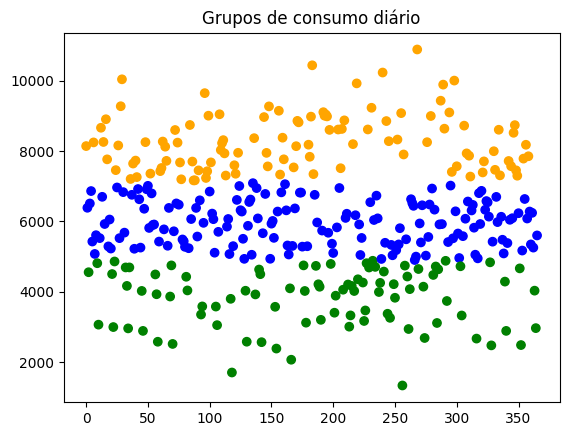

In [21]:
# 18
from sklearn.cluster import KMeans
import numpy as np

dias = df["Date"].map(lambda d: f"{d.day}/{d.month}/{d.day}")
data = df.groupby(by=dias)[["Global_active_power"]].sum()
k = KMeans(n_clusters=3, n_init="auto")
d = k.fit_predict(data)
groups = ["orange", "green", "blue"]
plt.title("Grupos de consumo diário")
plt.scatter(range(len(data)), data, c=list(map(lambda i: groups[i], k.labels_)))

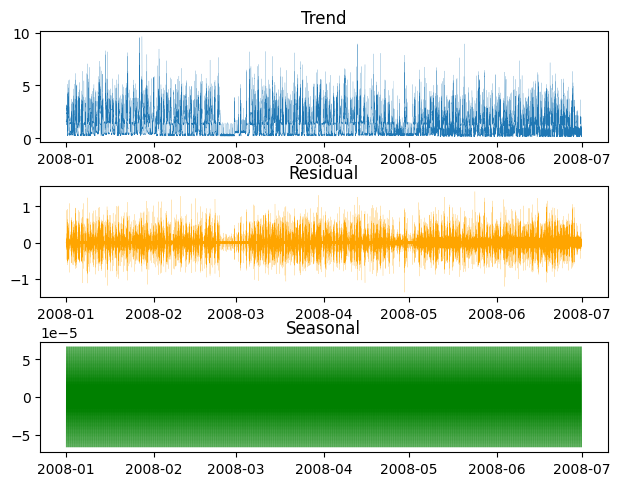

In [22]:
# 19

from statsmodels.tsa.api import seasonal_decompose

periodo = df[["Global_active_power", "Date"]][df["Date"].map(lambda d: d.year == 2008 and 1 <= d.month <= 6)]
dec = seasonal_decompose(periodo["Global_active_power"], period=2)
fig, axs = plt.subplots(3)
fig.tight_layout()
axs[0].plot(periodo["Date"], dec.trend, lw=0.1)
axs[0].set_title("Trend")
axs[1].plot(periodo["Date"], dec.resid, c="orange", lw=0.1)
axs[1].set_title("Residual")
axs[2].plot(periodo["Date"], dec.seasonal, c="green", lw=0.1)
axs[2].set_title("Seasonal")
plt.show()

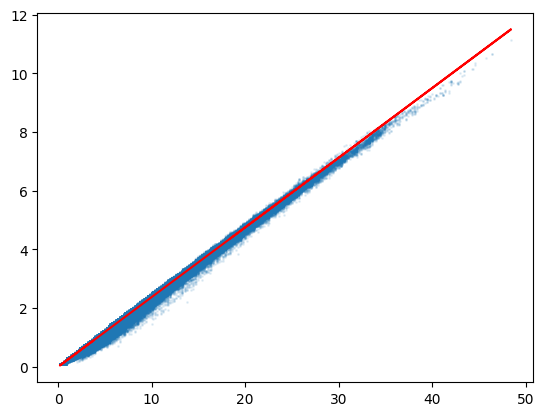

Erro médio: 0.0015796756352949523


In [23]:
# 20

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(df[["Global_intensity"]], df[["Global_active_power"]])
sub = plt.subplot()
sub.scatter(df["Global_intensity"], df["Global_active_power"], s=1, alpha=0.1)
p = model.predict(df[["Global_intensity"]])
sub.plot(df["Global_intensity"], p, c="red")
avg_error = (pd.Series(p.transpose()[0]) - df["Global_active_power"]).mean()
plt.show()
print(f"Erro médio: {avg_error}")